<a href="https://colab.research.google.com/github/dayanaramirez07/ModelosII/blob/main/lab1_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 - Parte 1 Regresión polinomial múltiple


In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/Intro_ML_2025/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
replicating Labs resources


In [5]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.01", varname="student");

logging in as dayana.ramirez@udea.edu.co... please wait

-------------
using course session introml::udea.vir.20252
success!! you are logged in
-------------


In [6]:
#configuración del laboratorio
# Ejecuta esta celda!
from Labs.commons.utils.lab1 import *
_, db, x, y = part_1()
y = y.reshape(np.size(y), 1)

cargando librerias y variables al ambiente


## Ejercicio 1: Contextualización del problema

El problema de regresión que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality).

In [7]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos", x)
print("variable a predecir", y)

conjunto de datos [[   2.6 1360.   150.  ... 1268.    13.6   48.9]
 [   2.  1292.   112.  ...  972.    13.3   47.7]
 [   2.2 1402.    88.  ... 1074.    11.9   54. ]
 ...
 [   2.4 1142.  -200.  ... 1092.    26.9   18.3]
 [   2.1 1003.  -200.  ...  770.    28.3   13.5]
 [   2.2 1071.  -200.  ...  816.    28.5   13.1]]
variable a predecir [[0.7578]
 [0.7255]
 [0.7502]
 ...
 [0.6406]
 [0.5139]
 [0.5028]]


In [8]:
#Ejercicio de Codigo
def num_muestras_carac(X):
    """Esta función se encarga de retornar el número de muestras
        y características del conjunto de datos X

        X: matriz numpy
        retorna:
            número de características (int/float)
            número de muestras (int/float)
    """

    n_muestras, n_carac = X.shape
    return n_carac, n_muestras

**Registra tu solución en línea**

In [9]:
student.submit_task(namespace=globals(), task_id='T1');

## Ejercicio 2

Analice los siguientes métodos de la teoría  de modelos de  *regresión polinomial múltiple*:

1. error cuadrático medio (**ECM**)
2. modelo de regresión múltiple (**regression**)
3. calculo del costo de la regresión (**cost**)
4. extension de matriz (**extension_matriz**)

La siguiente celda contiene la implementación de estas 4 funciones. Analizar y entender su funcionamiento

In [10]:
def ECM(Y_est,Y):
    """función para calcular el error cuadrático medio
    Y_est: debe contener los valores predichos por el modelo
    Y: debe contener los valores reales
    retorna: error cuadrático medio
    """
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(N)
    return ecm

def regression(X, W):
    """calcula la regresión multiple
    X: los valores que corresponden a las características
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado
    """
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


def cost_f(W,X,Y):
    """calcula la función de costo de la regresión para un vector W dado
    W: son los pesos usadados para realizar la regresión
    X: los valores que corresponden a las características
    Y: el valor de salida esperado

    retorna: valor de costo
    """

    m = len(Y)
    y_est = regression(X,W)
    cost = (1/(2*m)) * np.sum(np.square(y_est-Y))
    return cost

def extension_matriz(X):
    """función que realiza la extensión de la matriz X
    X: los valores que corresponden a las características sin extender
    Y: el valor de salida esperado

    retorna: X_ext: matriz con unos extendidos, Y: matriz con dimensiones ajustadas
    """
    #Obtenemos las dimensiones antes de exteneder la matriz
    caracterisitcas, muestras = num_muestras_carac(X)
    #Extendemos la matriz X
    unos = np.ones(muestras).reshape(-1,1)
    X_ext = np.concatenate((unos, X), axis=1)
    X_ext = X_ext.reshape(muestras, caracterisitcas+1)
    return X_ext


In [11]:
#Pregunta Abierta
#¿cual es el objetivo de la extension_matriz? recordar que estamos "ajustando" en una regresión

respuesta = "El objetivo es añadir una columna de unos a X para incluir el término independiente (bias) en la regresión. Esto permite que el modelo pueda ajustar un intercepto además de los pesos asociados a las características."

Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>:

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$

recordar que

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right) \frac{\partial }{\partial w_j} f({\bf{x}}_i, {\bf{w}})$$

Recuerde que debe usar las funciones ya implementadas y no usar **ninguna otra libreria**, adicional a las librerias ya pre-cargadas como numpy (se puede llamar con np.)

In [12]:
## Ejercicio de codigo
def gradiente_descendente(X, Y, eta, iteraciones, w_ini = None):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje

    retorna: W el valor de los parámetros de la regresión polinómica
             costos: array con el costo por iteración
    """
    # nuevamente usamos la función
    # para saber el número de muestras y características
    X_ext = extension_matriz(X)
    caracterisitcas, N = num_muestras_carac(X_ext)
    #Inicializamos el vector de parámetros con ceros
    if w_ini is not None:
        W = w_ini
    else:
        W = np.zeros((1,caracterisitcas))
    W = W.reshape(np.size(W), 1)
    # incializamos vector para almacenar costos
    costos = np.zeros(iteraciones)

    for i in range(iteraciones):
        ## Aca debes completar la función! recuerda que solo debes usar numpy (np.funcion_a_usar)
        # o las funciones definidas anteriormente
        # Puedes usar las funciones definidas antes
        y_est = regression(X_ext, W)
        f_xw_min_yi = y_est - Y.reshape(-1,1)

        # acutaliza
        gradiente = (1/N) * np.dot(X_ext.T, f_xw_min_yi)
        W = W - eta * gradiente

        #Estima el valor de la función de costo para el W actual
        costos[i] = cost_f(W,X_ext,Y)

    return W, costos

**Registra tu solución en línea**

In [13]:
student.submit_task(namespace=globals(), task_id='T2');

## Ejercicio 3: Entrenamiento

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento. Antes de realizar esto, debemos separar nuestro conjunto de datos.

In [14]:
# esto para lograr reproductibilidad
# de nuestro modelo
random.seed(1)
# usamos nuestra función para obtener el número de muestras
_, N = num_muestras_carac(x)
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]

In [15]:
#Pregunta Abierta
# ¿Porqué debemos hacer partición de datos? ¿Qué representa Xtrain, qué diferencia tiene con Xtest?
respuesta = "Debemos hacer partición para evaluar qué tan bien generaliza el modelo en datos nuevos. Xtrain se usa para entrenar el modelo (ajustar los pesos) y Xtest para evaluar su desempeño en datos no vistos."

Ahora entrena ejecutando la siguiente linea de codigo y verifiquemos el comportamiento del costo

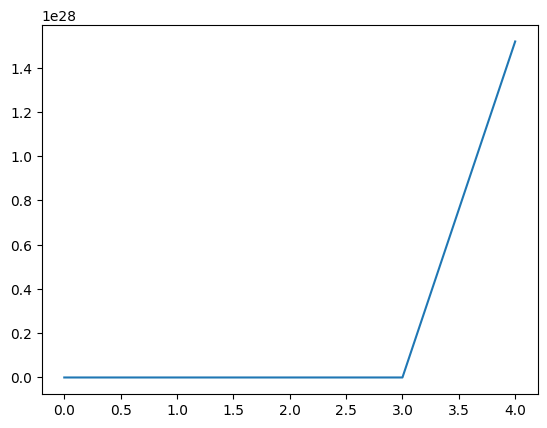

In [16]:
W, costo = gradiente_descendente(Xtrain, Ytrain, eta = 0.0001, iteraciones=5)
# graficar iteraciones y el costo
plt.plot(range(5), costo)
plt.show()

El costo es la medida que el algoritmo de optimización intenta mejorar. Sin embargo, para este tipo de problemas al final debemos evaluar que tan bien estamos modelando nuestra salida. Vamos a evaluar nuestro modelo calculando el error cuadrático medio. Para ello vamos crear a una función. Recuerda usar las funciones definidas anteriormente.

In [17]:
## Ejercicio de Código
def evaluar_modelo (W, X_to_test, Y_True):
    """ función que evalúa un modelo de regresión usando el error cuadrático medio

    W: es un matriz con los parámetros del modelo entrenados
    X_to_test: conjunto de datos para usar en la evaluación del modelo
    Y_True: valores reales para usar en la evaluación del modelo

    retorna: el error cuadrático medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X_to_test_ext = extension_matriz(X_to_test)
    y_est = regression(X_to_test_ext, W)
    error = ECM(y_est, Y_True)

    return(error)

**Registra tu solución en línea**

In [18]:
student.submit_task(namespace=globals(), task_id='T3');

In [19]:
# y ahora usala para calcular el error, para evaluar el modelo
error_train = evaluar_modelo(W, X_to_test = Xtrain,  Y_True = Ytrain)
print("error en entrenamiento del modelo", error_train)
error_test = evaluar_modelo(W, X_to_test = Xtest,  Y_True = Ytest)
print("error en la evaluación del modelo", error_test)

error en entrenamiento del modelo 3.0367139541075616e+28
error en la evaluación del modelo 3.1009466355433875e+28


In [20]:
# ¿Que tan bueno es tu modelo?
respuesta = "El modelo no es bueno porque el error cuadrático medio es extremadamente alto, lo que indica que no logra aproximar bien los valores reales. Esto puede deberse a que la tasa de aprendizaje no es adecuada, se usaron muy pocas iteraciones de entrenamiento o los datos no están normalizados."

## Ejercicio 4: Polinomio de orden superior

Hasta ahora lo que hemos realizado es un regresión lineal de orden 1. Nuestro siguiente objetivo es tomar esta regresión y transformarla en un polinomio de mayor orden. Comprenda el funcionamiento de la función propuesta:

In [21]:
#Potencia de polinomio
def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las características
    grado: es el grado para elevar la potencia al polinomio
    retorna: el valor de X después de elevarlo al grado del polinomio indicado
    """
    X2 = X.copy()

    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)

    return X2

ahora debemos usar esta función para completar la siguiente.
**PISTAS**
- Usa las funciones previamente construidas
- Para completar `gradiente_descendente_poly` Tener presente que buscamos realizar este proceso: aplicar la `potenciaPolinomio` ->  aplicar gradiente descendente
- Para completar `evaluar_modelo_poly` Tener presente que buscamos realizar este proceso: aplicar la `potenciaPolinomio`  -> evaluar el modelo

In [22]:
## Ejercicio de codigo
def gradiente_descendente_poly (X, Y, eta, iteraciones, grado):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    iteraciones: numero de iteraciones maximo para el gradiente
    grado: el valor del grado del polinomio a usar

    retorna: W el vector con los parámetros de la regresión polinomica
             costo: array con el valor del costo por cada iteracion

    """
    ## completa el codigo
    X2 = potenciaPolinomio(X, grado)
    W, costo = gradiente_descendente(X2, Y, eta, iteraciones)
    return (W, costo)

def evaluar_modelo_poly (W, X_to_test, Y_True, grado):
    """ función que evalúa un modelo de regresión usando el error cuadrático medio

    W: es un matriz con los parámetros del modelo entrenado
    X_to_test: conjunto de datos para usar en la evaluación del modelo
    Y_True: valores reales para usar en la evaluación del modelo
    grado: grado del polinomio a usar

    retorna: el error cuadrático medio
    """
    ## Comienza a completar tu codigo. Recuerda usar la funciones ya definidas
    X2 = potenciaPolinomio(X_to_test, grado)
    error = evaluar_modelo(W, X2, Y_True)

    return(error)

**Registra tu solución en línea**

In [23]:
student.submit_task(namespace=globals(), task_id='T4');

Entrenemos y evaluemos el comportamiento del costo con la regresion polinómica ¿Vemos algún cambio positivo?

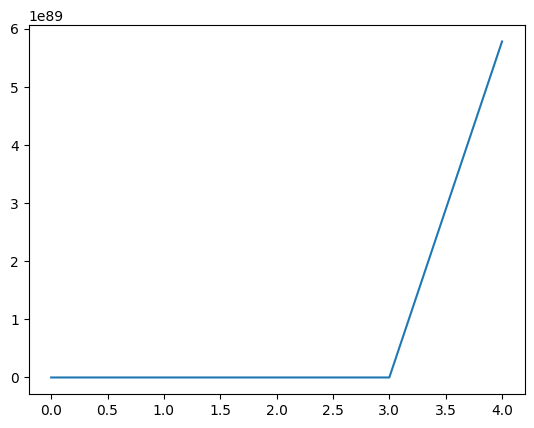

In [24]:
# entrenamos
W, costo_poly = gradiente_descendente_poly(Xtrain, Ytrain, eta = 0.0001, iteraciones=5, grado = 2)
plt.plot(range(5), costo_poly)

In [25]:
# completa los parámetros para evaluar el modelo
error_test = evaluar_modelo_poly(W, X_to_test = Xtest,  Y_True = Ytest, grado = 2)
print("error en la evaluación del modelo", error_test)

error en la evaluación del modelo 1.2019282322540722e+90


## Ejercicio 5: Normalización

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinomios. Vamos a dejar por ahora un número de iteraciones fijas = 5. Para ello completa la siguiente función.



In [26]:
## Ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ función para realizar experimentos.
    Xtrain: conjunto de datos de entrenamiento
    Xtest: conjunto de datos para evaluación
    Ytrain: salidas reales del conjunto de entrenamiento
    Ytest: salidas reales del conjunto de evaluación
    tasas: Es una lista con los valores númericos de tasas de aprendizaje
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 5

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:

            # ignorar el costo
            W, _ = gradiente_descendente_poly(Xtrain, Ytrain, eta, numero_iter, grado)
            error = evaluar_modelo_poly(W, Xtest, Ytest, grado)

            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'ecm'] = error
            idx = idx+1

    return (resultados)

In [27]:
## Ahora ejecutamos la función desarrollada para ver los resultados
tasas_aprendizaje = [1e-6, 1e-5, 1e-3, 1e-2]
grados_polinomio = [1,2]
resultados_ex1 = experimentar(Xtrain, Xtest, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)

In [28]:
#Imprimimos los resultados
resultados_ex1

,grado,tasa de aprendizaje,ecm
0,1.0,0.000001,5.020085e+07
1,2.0,0.000001,1.201927e+70
2,1.0,0.000010,2.662354e+18
3,2.0,0.000010,1.201928e+80
4,1.0,0.001000,3.148197e+38
5,2.0,0.001000,1.201928e+100
6,1.0,0.010000,3.152958e+48
7,2.0,0.010000,1.201928e+110


Si has implementado todo correctamente, parecieria que nuestros entrenamientos no esta logrando buenos resultados (hasta parece haber errores infinitos! o no determinados!).

Crea una función que implemente la normalización z-score: $\bar{x} = \frac{x-\mu}{\sigma}$. Debe estimar los parámetros de la normalización con los datos de entrenamiento y aplicar la normalización tanto a los datos de entrenamiento como a los de test.


In [31]:
## Ejercicio de codigo
def normalizar(Xtrain, Xtest):
    """ función para normalizar los datos
    Xtrain: matriz de datos de entrenamiento a normalizar
    Xtest: matriz de datos de evaluación a normalizar
    retorna: matrices normalizadas
    """
    mu = np.mean(Xtrain, axis=0)
    sigma = np.std(Xtrain, axis=0)

    Xtrain_n = (Xtrain - mu) / sigma
    Xtest_n = (Xtest - mu) / sigma
    # si hay una desviacion por cero, reemplazamos los nan
    Xtrain_n = np.nan_to_num(Xtrain_n)
    Xtest_n = np.nan_to_num(Xtest_n)
    return (Xtrain_n, Xtest_n)

**Registra tu solución en línea**

In [32]:
student.submit_task(namespace=globals(), task_id='T5');

Ahora vuelve a realizar los mismos experimentos, pero esta vez usa los valores de salida de la función anterior.

In [33]:
Xtrain_n, Xtest_n = normalizar(Xtrain, Xtest)

In [34]:
resultados_ex2 = experimentar(Xtrain_n, Xtest_n, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)
#para ver los resultados
resultados_ex2

,grado,tasa de aprendizaje,ecm
0,1.0,0.000001,1497.356668
1,2.0,0.000001,1496.102213
2,1.0,0.000010,1496.699426
3,2.0,0.000010,1484.203226
4,1.0,0.001000,1426.168241
5,2.0,0.001000,597.917000
6,1.0,0.010000,923.328838
7,2.0,0.010000,15.635865


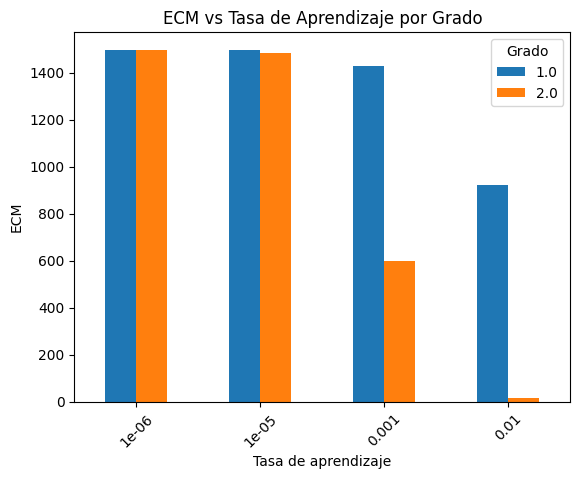

In [35]:
# ejecuta esta linea de codigo para graficar tus resultados
import matplotlib.pyplot as plt

# Grouping the data for plotting
grouped = resultados_ex2.groupby(['tasa de aprendizaje', 'grado'])['ecm'].mean().unstack()

# Creating the bar plot
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax)

# Labels and title
ax.set_xlabel('Tasa de aprendizaje')
ax.set_ylabel('ECM')
ax.set_title('ECM vs Tasa de Aprendizaje por Grado')

# Adding legend
ax.legend(title='Grado')

plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

Ten en cuenta el resutaldo de los  dos experimentos y  responde las  siguientes preguntas abiertas

In [36]:
# Pregunta abierta
#¿Qué proceso hace la normalización sobre los datos? Consulte qué es el número de condición de una matriz y analice qué relación tiene ese concepto con el proceso de normalización
respuesta = "La normalización transforma las variables para que tengan media 0 y desviación estándar 1, eliminando las diferencias de escala. El número de condición mide la estabilidad numérica de una matriz: si es alto, pequeñas perturbaciones en los datos generan grandes errores en los resultados. Normalizar reduce el número de condición, haciendo más estable y eficiente el entrenamiento del modelo."

In [37]:
# Pregunta abierta
#¿cuáles son los tipos de normalización más comunes. ¿Piensa en cuándo es más apropiado usar uno u otro?
respuesta = "Los tipos más comunes son: (1) Z-score, que centra y escala a varianza unitaria, útil cuando los datos tienen distinta escala o distribución cercana a normal; (2) Min-Max, que lleva los datos a un rango [0,1], usado en redes neuronales y algoritmos sensibles a magnitudes absolutas; (3) Normalización por norma (L1/L2), apropiada en datos dispersos como texto; y (4) Robust scaling, que usa mediana y es más robusta a outliers. La elección depende del algoritmo y la naturaleza de los datos."

Finalmente, en nuestro tercer experimento, vamos a ver el efecto de las iteraciones sobre el error. Completa la siguiente función. Esta vez la tasa de aprendizaje es constante.

In [38]:
## ejercicio de codigo
def experimentar_2 (Xtrain, Xtest, Ytrain, Ytest, iteraciones, grados):
    """ función para realizar experimentos.
    Xtrain: conjunto de datos de entrenamiento
    Xtest: conjunto de datos para evaluación
    Ytrain: salida real para el conjunto de entrenamiento
    Ytest: salida real para el conjunto de evaluación
    tasas: Es una lista con los valores númericos de tasas de aprendizaje
        para realizar los experimentos
    rangos: Es una lista con los valores númericos de grados
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    eta = 1e-2
    resultados = pd.DataFrame()
    idx = 0 # indice
    for itera in iteraciones:
        for grado in grados:
            # ignora el costo
            W, _ = gradiente_descendente_poly(Xtrain, Ytrain, eta, itera, grado)
            error = evaluar_modelo_poly(W, Xtest, Ytest, grado)

            resultados.loc[idx,'iteraciones'] = itera
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'ecm'] = error
            idx = idx+1
    return (resultados)

In [39]:
num_iters = [1,5,10,50, 100,200, 1000, 2000]
grados_polinomio = [1,2]
# usamos la función para evaluar los resultados
resultados_ex3 = experimentar_2(Xtrain_n, Xtest_n, Ytrain, Ytest, num_iters, grados_polinomio )

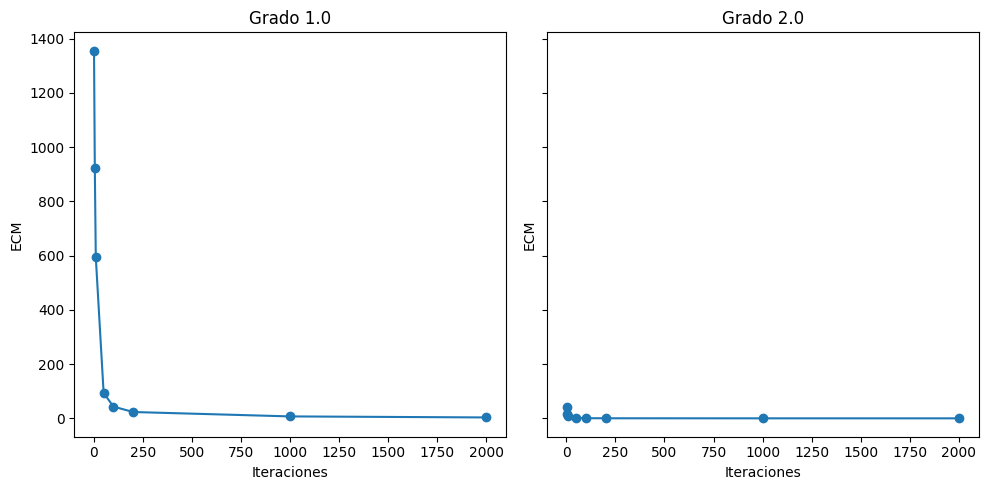

In [40]:
# ejecuta esta línea de código para ver gráficamente tus resultados
import matplotlib.pyplot as plt

grados = resultados_ex3['grado'].unique()
fig, axes = plt.subplots(1, len(grados), figsize=(5 * len(grados), 5), sharey=True)

if len(grados) == 1:
    axes = [axes]

for ax, grado in zip(axes, grados):
    subset = resultados_ex3[resultados_ex3['grado'] == grado]
    ax.plot(subset['iteraciones'], subset['ecm'], marker='o', linestyle='-')
    ax.set_title(f'Grado {grado}')
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('ECM')

plt.tight_layout()
plt.show()
